<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-1" data-toc-modified-id="Project-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project 1</a></span><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Problem-Specifics" data-toc-modified-id="Problem-Specifics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Specifics</a></span></li><li><span><a href="#Project-1-Deliverables" data-toc-modified-id="Project-1-Deliverables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Project 1 Deliverables</a></span></li><li><span><a href="#Notes/Expectations" data-toc-modified-id="Notes/Expectations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Notes/Expectations</a></span></li><li><span><a href="#Appendix-A:-Introduction-To-the-Zumo" data-toc-modified-id="Appendix-A:-Introduction-To-the-Zumo-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Appendix A: Introduction To the Zumo</a></span></li><li><span><a href="#Appendix-B:-Getting-your-computer-set-up-for-Zumo" data-toc-modified-id="Appendix-B:-Getting-your-computer-set-up-for-Zumo-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Appendix B: Getting your computer set up for Zumo</a></span></li><li><span><a href="#Appendix-C:-Your-First-Zumo-Program" data-toc-modified-id="Appendix-C:-Your-First-Zumo-Program-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Appendix C: Your First Zumo Program</a></span></li><li><span><a href="#Collecting-Data-from-your-Zumo-and-Plotting-with-MATLAB" data-toc-modified-id="Collecting-Data-from-your-Zumo-and-Plotting-with-MATLAB-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Collecting Data from your Zumo and Plotting with MATLAB</a></span></li></ul></li></ul></div>

# Project 1

## Challenge

Most of the time, an autonomous robot is equipped with advanced sensors, such as [rotary encoders](https://en.wikipedia.org/wiki/Rotary_encoder), [GPS sensors](https://en.wikipedia.org/wiki/Global_Positioning_System), [LiDAR sensors](https://en.wikipedia.org/wiki/Lidar), cameras, or [inertial measurement units](https://en.wikipedia.org/wiki/Inertial_measurement_unit) to navigate as accurately and efficiently as possible. 

However, no sensor is impervious to errors or failures. 

In this project, you are working with Zumo robots implemented as semi-autonmous material handling vehicles in a facility that handles hazardous materials. The robot works on a floor that is below ground level, so in case of an emergency such as a fire, the robot must use a service elevator to return to the ground floor to escape the hazard and remove the hazardous material from the danger so it does not create additional risks. The service elevator in the factory was originally designed to hold up to four zumo robots packed 2x2, and is shown in the diagram below. 

<font color='white'>.
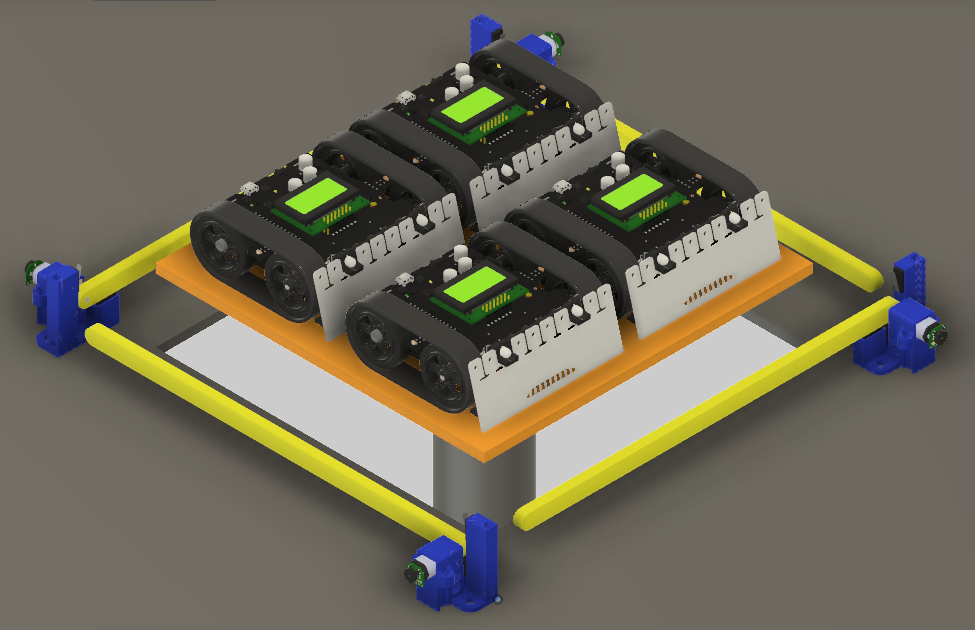
.</font>


In an emergency, the elevator will rise automatically as the open elevator shaft needs to be closed to seal off the ground floor from any smoke or fire below.  The elevator is timed to provide the zumo *just enough time* to get on the platform, and it calculates this time based on how far away the factory's central control system reports that the zumo is from the elevator platform.

Your zumo is equiped with a material handing rack that carries the hazardous cargo.  As long as the Zumo itself gets onto the elevator platform, the elevator will be able to lift the Zumo and the cargo to safety even if some of the cargo is "hanging off" the edge of the platform.

In [1]:
from IPython.display import HTML

HTML('<iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/721212/sp/72121200/embedIframeJs/uiconf_id/40617032/partner_id/721212?iframeembed=true&playerId=kaltura_player&entry_id=1_o9glzdwv&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_phug52vy" width="700" height="500" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" frameborder="0" title="Kaltura Player"></iframe>')



/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Under normal operation, the robot would use its line-following sensors, distance sensors, and wheel encoders to reach the elevator. However, if some or most of the robot's navigational sensors fail during the emergency event, it can't use them to help it escape! In a situation like this, the robot may need to use an *internal model* of its own dynamics to navigate without all of its sensors. 

Luckily, your experience in system dynamics (ME352) and the material presented in the first two weeks of this course can be combined to help a robot overcome this catastrophic sensor fault which leaves it without any of its sensing capabilities.

Therefore, you will approach this project as if the robot has no closed loop control capability. So a well-calibrated dynamic model of the robot's behavior should allow it to use what it knows about the payload it is carrying and its own internal dynamics to reach the platform in a timely manner.

Note that if the zumo arrives too early, it wll impact the gates (as its sensors are not working) and potentially get stuck before it can get on the platform.  If the zumo arrives too late, the elevator will try to wait for it, but because it has to wait the fire will spread to the upper floors.  If the zumo arrives just after the gates open and is positioned on the platform before they close, it will reach safety.

## Problem Specifics


**Your task for project 1 is to program your Zumo robot (with or without a payload of arbitrary mass) to go a given, user-selected distance in *specified time* __without using any of its sensors.__**

**When we say "without using any of its sensors," we mean:** Your robot may not use the encoders to make decisions while it is moving to try to get on the platform.  In the real sensor fault situation, the encoders wouldn't even be available for measurement.  For this project they are operational, but you will not access them during normal operation.

However, Zumo's wheel encoders **MAY be used** to measure distance traveled and/or robot velocity the **during system modeling** to help you calibrate your equations of motion.

That's it. Just make the robot travel straight for a given distance (between 2 and 20 zumo lengths) given a certain time criterion. 

Here are the **fixed assumptions** everyone will use and can't be changed by you:

1. The robot should simply go in a straight line for project 1, which means you can assume that the robot is already facing the elevator when the run begins.
2. By changing two parameteres in your code, you should be able to program your Zumo to go *precisely* the target distance within the target time, even if the Zumo is loaded with a payload  of **known** mass of up to 2kg. 
3. Once your distance and added mass are set in code, uploading the Zumo code by itself shall not make the robot move. The robot will wait for user input.
4. A press on the robot's "button C" will initiate motion, but The robot will not move for at least two seconds *after* button C on the robot is pressed. This press on button C is meant to simulate a "return to base" signal.
5. Before the robot moves, it must sound an alarm for at least 1 second to alert any nearby people or robots of its intent to move.
6. While the robot is moving, it must flash the user LED (yellow). The light must flash with a frequency of at least 2 Hz and no more than 10 Hz.
7. When the robot is finished with a "run," representing a fault-condition return to the elevator platform, it will sound another alarm at a different pitch than the first, and wait for another "go" input from the user on button C.
8. Your robot's accuracy in traveling the prescribed distance will be evaluated together with the time it takes to traverse that distance will be weighted equally in determining your performance score for the project.


## Project 1 Deliverables

Your primary deliverable is a 1-2 page writeup detailing your design methodology and showcasing your design's performance. It should simply answer the question, how did *you* solve the problem? Include relevant diagrams, plot and tables.  Code will be provided as an *Appendix* to your 1-2 page writeup. Equations can be part of the report's main body, but derivations would also be in the *appendices*. You're audience is your supervisor who is "fluent in the art," but would expect to see evidence that you made decisions with justification and the writeup has sufficient detail to allows that person to quickly evaluate your design methodology. Be brief, but concise.

You will also need to demonstrate your working program in lab during the **Week 7 (10/7-10/11) Laboratory Period.** You'll do this by participating in a competition with the other members of your section.  You won't be competing against each other, just trying to achieve the best performance. You'll be given a random distance, a target time range, and a randomly-assigned payload for your robot. Your robot will start exactly that distance away from the elevator platform, loaded with the new payload. Your score on the project will be partially based on a combination of your robot's ability to make it to the elevator platform and whether the robot makes it there before the elevator gates close. 

Instructors will provide "practice payloads" for your use in the weeks leading up to the project due date. 


## Notes/Expectations

This project (and the other two to follow) are INDIVIDUAL assignments. You may exchange ideas with your classmates, but you may not exchange code. Your writing, code, plots, figures, and diagrams must be your own. You're expected to work on this project outside of class, and in order to avoid assignments "stacking" uncomfortably, you should start soon so that you run into big problems early and can get help. The project is designed to help you develop relevant questions about the course material, and to give you an opportunity to truly help you understand the concepts taught in this course by having you synthesize them in a new context.

Below, is some basic information about how to get started with your robot.

## Appendix A: Introduction To the Zumo

The Zumo is a small, tracked robot made by Pololu, inc. The robot has two wheel encoders, three proximity sensors, an array of line-following sensors, a compass, a gyroscope, and an accelerometer. It uses an Arduino-like processor and can be programmed using the Arduino environment.

<img src='attachment:image.png' width=400px/>

Many of you have used Arduino before, so we won't spend too much time on paper hashing out the very basics. If you need help with the basics, there are tons of tutorials on [the Arduino website](www.arduino.cc) for you to check out.

You need to follow the links below to use your Zumo on your personal computer (or a Lafayette Computer that is not fully equipped)
* [Installing the Arduino Integrated Development Environment (IDE)](https://www.arduino.cc/en/Main/Software)
* [Installing the Zumo Library](https://www.pololu.com/docs/0J63/6)
* [Installing the Zumo drivers on Windows](https://www.pololu.com/docs/0J63/5.1)

Other relevant links you should keep handy:
* [Programming Zumo with the Arduino IDE](https://www.pololu.com/docs/0J63/5.2)
* [Basic Arduino Language & Concept Tutorials](https://www.arduino.cc/en/Tutorial/Foundations)
* [Arduino Language Reference](https://www.arduino.cc/en/Reference/HomePage)
* [Datatypes in Arduino](https://learn.sparkfun.com/tutorials/data-types-in-arduino)
* [Zumo Library for Arduino Reference](http://pololu.github.io/zumo-32u4-arduino-library/)

## Appendix B: Getting your computer set up for Zumo

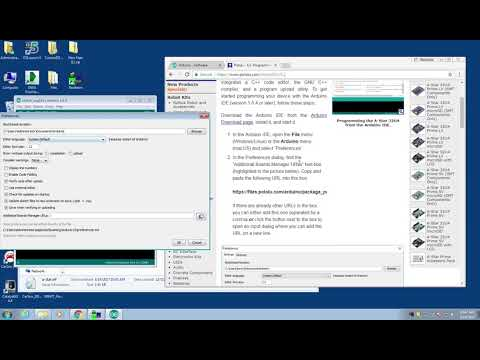

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ALGiRQlcAPE')

## Appendix C: Your First Zumo Program

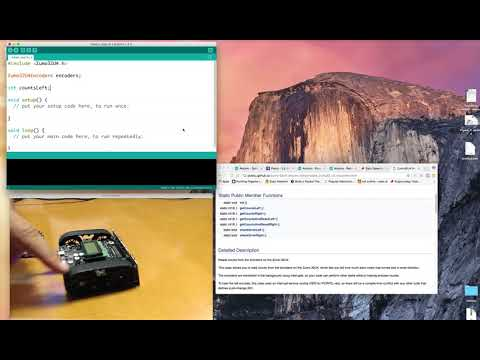

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('1DPQWo-TroY')

**NOTE:** in the video, I'm using a Mac-- for whatever reason, if you're using the Zumo32U4 library on Windows, you can't just import the Zumo32U4.h library. You also have to import Wire.h. The modification to the code presented in the video above is simple. Here's an updated version for reference:

```c++
#include <Wire.h>
#include <Zumo32U4.h>

Zumo32U4Encoders encoders;
Zumo32U4ButtonA buttonA;

int countsLeft;
unsigned long millisec;
boolean buttonstate;

void setup() {
  Serial.begin(115200);
}

void loop() {
  millisec = millis();
  buttonstate = buttonA.isPressed();
  countsLeft = encoders.getCountsLeft();

  Serial.print(millisec);
  Serial.print("\t");
  Serial.print(buttonstate);
  Serial.print("\t");
  Serial.print(countsLeft);
  Serial.println();
}
```

## Collecting Data from your Zumo and Plotting with MATLAB

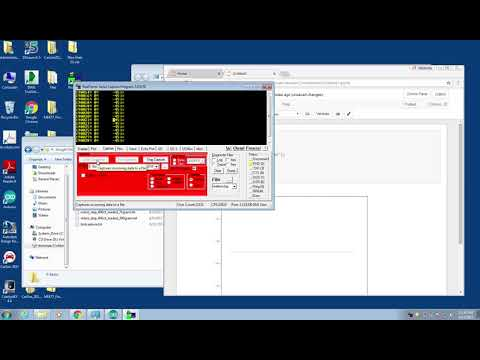

In [3]:
YouTubeVideo('sxX26ET8bYk')